In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [4]:
type(train_df)

pandas.core.frame.DataFrame

In [5]:
print(train_df)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

## Basic Structure Exploration

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 27.8+ KB


In [8]:
test_df['Survived'] = -888 #Give a default value for now

In [9]:
df = pd.concat((train_df, test_df)) #axis = 0 is appending, axis = 1 is merging (addtl. columns)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 97.2+ KB


In [11]:
df.head() #get first 5 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.head(10) #head can be specified

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [13]:
df.tail() #last 5 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,-888,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,-888,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,-888,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,-888,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,-888,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
df.Name # or df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [15]:
#selecting multiple columns needs to use the strings
df[['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
1305,"Spector, Mr. Woolf",NaN
1306,"Oliva y Ocana, Dona. Fermina",39.0
1307,"Saether, Mr. Simon Sivertsen",38.5


In [16]:
#Label-based Indexing: [rows,columns] below gives rows 5 to 10 for given columns
df.loc[5:10, 'Pclass':'Age']

,Pclass,Name,Sex,Age
PassengerId,,,,
5,3,"Allen, Mr. William Henry",male,35.0
6,3,"Moran, Mr. James",male,NaN
7,1,"McCarthy, Mr. Timothy J",male,54.0
8,3,"Palsson, Master. Gosta Leonard",male,2.0
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


In [17]:
#discrete
df.loc[5:10, ['Survived','Embarked']]

,Survived,Embarked
PassengerId,,
5,0,S
6,0,Q
7,0,S
8,0,S
9,1,S
10,1,C


In [18]:
#position-based indexing
df.iloc[5:10, 3:8]

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
6,male,NaN,0,0,330877
7,male,54.0,0,0,17463
8,male,2.0,3,1,349909
9,female,27.0,0,2,347742
10,female,14.0,1,0,237736


In [19]:
#filter rows based on condition
male_passengers = df.loc[df.Sex == 'male',:]
print('# of male passengers : {0}'.format(len(male_passengers)))

# of male passengers : 843


In [20]:
#filter rows based on multiple condition
male_passengers_fc = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('# of male passengers in first class : {0}'.format(len(male_passengers_fc)))

# of male passengers in first class : 179


## Summary Statistics

In [25]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-283.301757,2.294882,29.881138,0.498854,0.385027,33.295479
std,414.337413,0.837836,14.413493,1.041658,0.865560,51.758668
min,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-888.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [26]:
df.Fare.mean()

33.29547928134557

In [27]:
df.Fare.median()

14.4542

In [28]:
df.Fare.max() - df.Fare.min()

512.3292

In [29]:
df.Fare.quantile(.25)

7.8958

In [30]:
df.Fare.std()

51.75866823917411

In [35]:
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

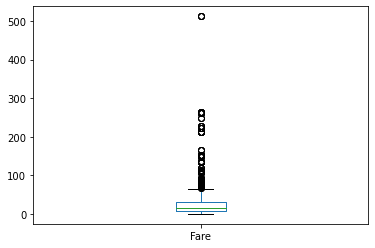

In [45]:
df.Fare.plot(kind='box')

In [36]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,-283.301757,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,414.337413,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,-888.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,-888.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [37]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [38]:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [40]:
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

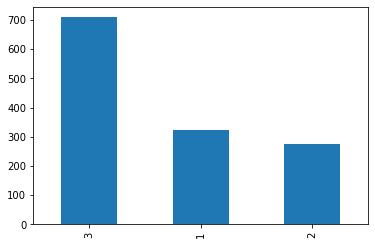

In [46]:
trialplot = df.Pclass.value_counts().plot(kind='bar')

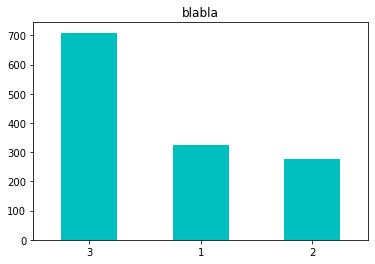

In [48]:
trialplot = df.Pclass.value_counts().plot(kind='bar', rot = 0, title = 'blabla', color = 'c')

## Distributions

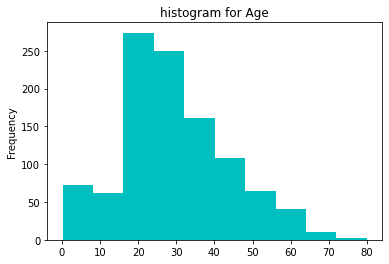

In [50]:
#histograms
df.Age.plot(kind='hist',title='histogram for Age', color='c')

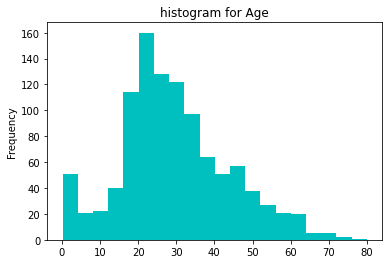

In [51]:
#use bins myself
df.Age.plot(kind='hist',title='histogram for Age', color='c', bins=20)

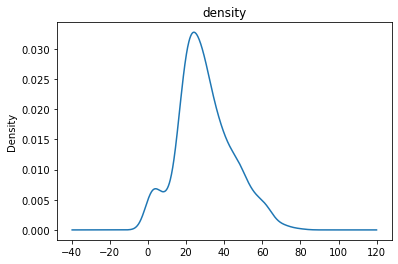

In [55]:
#use kde plot for density
df.Age.plot(kind='kde',title='density')

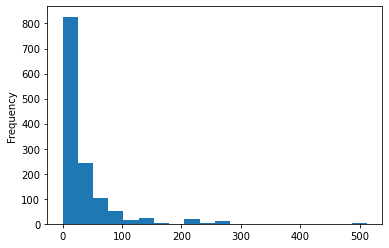

In [56]:
#histogram for Fares
df.Fare.plot(kind='hist', bins =20)

In [59]:
#skweness
print(df.Age.skew())
print(df.Fare.skew())

0.40767455974362266
4.367709134122922


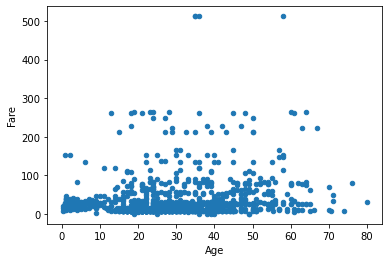

In [60]:
#use scatter plot
df.plot.scatter(x='Age', y='Fare')

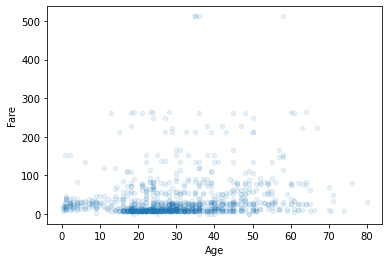

In [61]:
#with Alpha
df.plot.scatter(x='Age', y='Fare', alpha=0.1)

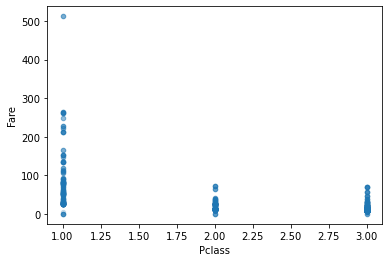

In [62]:
df.plot.scatter(x='Pclass', y='Fare', alpha=0.2)

In [63]:
##group by
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [65]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [66]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [69]:
df.groupby(['Pclass'])[['Fare','Age']].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [70]:
#aggregate
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [71]:
#more complicated aggregations
#nested dict variable

##THIS IS DEPRECATED
aggregations = {
    'Fare': {
        'mean_Fare' :'mean',
        'median_Fare': 'median',
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age':{
        'median_Age':'median',
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min (X) #Age range per group
    }
}

In [83]:
#more complicated aggregations
#nested dict variable

##NEW METHOD!!
aggregations = {
    'Fare': {
        'mean',
        'median',
        max,
        min
    },
    'Age':{
        'median',
        min,
        max,
     lambda x: max(x) - min(x) #Age range per group
    }
}

In [82]:
df.groupby(['Pclass']).agg(aggregations).rename(columns={'<lambda_0>': 'range'})

Fare                                 Age                    
        min       mean   median       max   min  range median   max
Pclass                                                             
1       0.0  87.508992  60.0000  512.3292  0.92  79.08   39.0  80.0
2       0.0  21.179196  15.0458   73.5000  0.67  69.33   29.0  70.0
3       0.0  13.302889   8.0500   69.5500  0.17  73.83   24.0  74.0

In [85]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

## Crosstabs

In [86]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


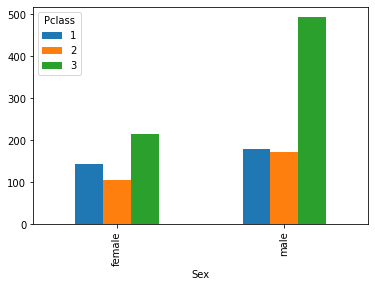

In [87]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

## Pivots

In [88]:
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [89]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [90]:
##gives pivot table
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


# Data Munging

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 129.2+ KB


### Feature: Embarked

In [93]:
#extract rows where Embarked is null
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [94]:
#most common embarkment point
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [96]:
##embarkment point by survival
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [97]:
#impute the missinb value with "S"
####Option 1
#df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
###Option 2: fillna fills all null values
#df.Embarked.fillna('S', inplace=True)

In [99]:
##look further for Embarkment point. Look at fare
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [100]:
##Above tells us that C is most likely given Fare and Class
df.Embarked.fillna('C', inplace=True)

In [101]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 129.2+ KB


### Feature: Fare

In [103]:
df[df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-888,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [104]:
#use same function as above to decide Fare by class and Embarked
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,78.2667,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [106]:
##Above shows fare of 8.050
##let's make it programmaticaly though
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [107]:
##now replace value
df.Fare.fillna(median_fare,inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 129.2+ KB


### Feature: Age

In [109]:
##set max number
pd.options.display.max_rows = 15

In [110]:
df[df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
1300,-888,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,-888,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,-888,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


### Option 1: Replace with mean Age
df.Age.plot(kind='hist', bins=20)

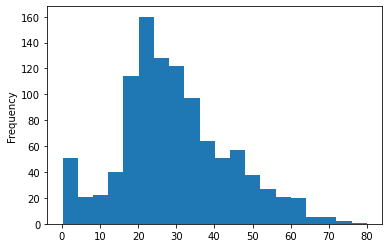

In [121]:
df.Age.plot(kind='hist', bins=20)

In [112]:
df.Age.mean()

29.881137667304014

In [114]:
##mean pushed higher up: problem.
#df.Age.fillna(df.Age.mean(), inplace=True)   is thus not a good option

### option 2: median and gender
df.groupby('Sex').Age.median()

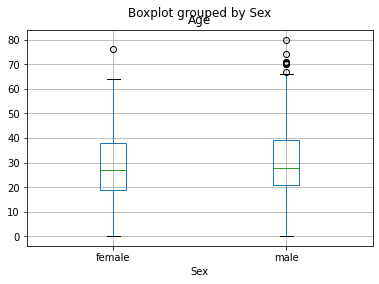

In [116]:
df[df.Age.notnull()].boxplot('Age','Sex')

In [117]:
##too similar so gender isn't a great option

#age_sex_median = df.groupby('Sex').Age.transform('median')
#df.Age.fillna(age_sex_median, inplace=True)

### option 3 replace with Pclass and median Age 

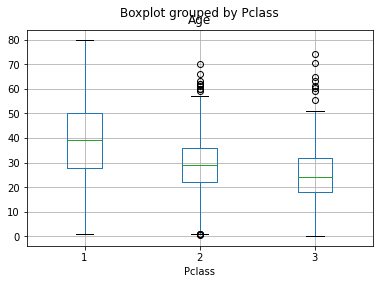

In [119]:
df[df.Age.notnull()].boxplot('Age','Pclass')

In [120]:
##can be replaced with transform option above

### Option 4: go with age of title

In [122]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [125]:
#Function to get title from the name
def GetTitle(name):
    first_name_with_title = name.split(',')[1] ## get everything after comma
    title = first_name_with_title.split('.')[0]##get everything before dot
    title = title.strip().lower() ##make lower case and strip white space
    return title


In [127]:
df.Name.map(lambda x: GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [129]:
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [131]:
##Adjust GetTitle function to group titles together
def GetTitle(name):
    title_group = {'mr': 'Mr',
                  'mrs':'Mrs',
                   'miss':'Miss',
                   'master':'Master',
                   'don':'Sir',
                   'rev':'Sir',
                   'dr':'Officer',
                   'mme':'Mrs',
                   'ms':'Mrs',
                   'major':'Officer',
                   'lady':'Lady',
                   'sir':'Sir',
                   'mlle':'Miss',
                   'col':'Officer',
                   'capt':'Officer',
                   'the countess':'Lady',
                   'jonkheer':'Sir',
                   'dona':'Lady'
                  }
    first_name_with_title = name.split(',')[1] ## get everything after comma
    title = first_name_with_title.split('.')[0]##get everything before dot
    title = title.strip().lower() ##make lower case and strip white space
    return title_group[title]

In [132]:
# create new Title column in the existing dataframe
df['Title'] = df.Name.map(lambda x: GetTitle(x))

In [133]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


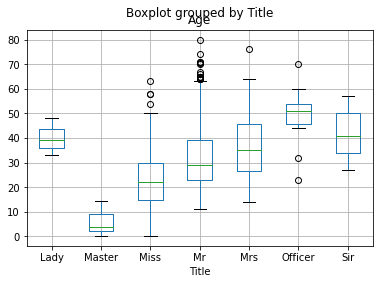

In [134]:
df[df.Age.notnull()].boxplot('Age','Title')

In [136]:
#replace missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median,inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 134.3+ KB


## Working with Outliers

### Age

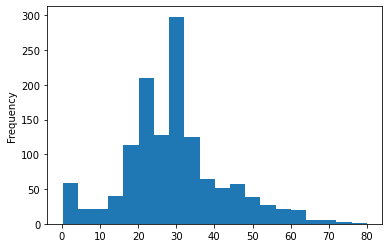

In [138]:
df.Age.plot(kind='hist',bins =20)

In [139]:
df.loc[df.Age > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr
988,-888,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,Mrs


### Fare

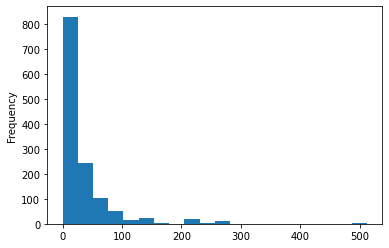

In [140]:
df.Fare.plot(kind='hist', bins=20)

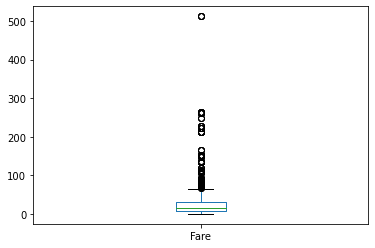

In [141]:
df.Fare.plot(kind='box')

In [143]:
##look into oultier
df.loc[df.Fare == df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,-888,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [144]:
# try some transformations
LogFare = np.log(df.Fare + 1.0) #adding 1 to accomodate zero fares : log(0) is not defined

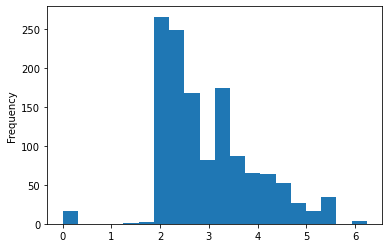

In [145]:
LogFare.plot(kind='hist', bins=20)

In [146]:
pd.qcut(df.Fare,4) #quantile based binning

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [147]:
pd.qcut(df.Fare,4, labels = ['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

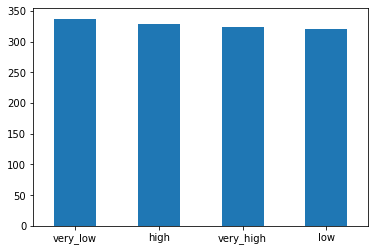

In [148]:
#visualization shows that all have the same count
pd.qcut(df.Fare,4, labels = ['very_low','low','high','very_high']).value_counts().plot(kind='bar',rot=0)

In [149]:
##create fare bin feature/column
df['Fare_Bin'] = pd.qcut(df.Fare,4, labels = ['very_low','low','high','very_high'])

# Feature Engineering

### Feature: Age State (Adult or Child)

In [151]:
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [152]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [153]:
##crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### Feature: FamilySize

In [154]:
df['FamilySize'] = df.Parch + df.SibSp + 1 #+1 for Self 

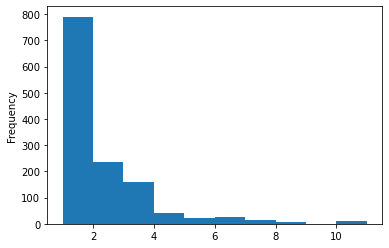

In [155]:
df['FamilySize'].plot(kind='hist')

In [156]:
df.loc[df.FamilySize == df.FamilySize.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.55,NaN,S,Master,very_high,Child,11
181,0,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
202,0,3,"Sage, Mr. Frederick",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
325,0,3,"Sage, Mr. George John Jr",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
793,0,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
847,0,3,"Sage, Mr. Douglas Bullen",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
1080,-888,3,"Sage, Miss. Ada",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
1234,-888,3,"Sage, Mr. John George",male,29.0,1,9,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11


In [157]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature: IsMother

In [158]:
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')),1,0)

In [159]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Deck

In [160]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [161]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [162]:
df.loc[df.Cabin == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,very_high,Adult,1,0


In [163]:
df.loc[df.Cabin == 'T','Cabin'] = np.NaN

In [164]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [165]:
#extract first character of cabin as Deck. Use Z for null values
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x: get_deck(x))

In [166]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [167]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Ticket      1309 non-null   object  
 8   Fare        1309 non-null   float64 
 9   Cabin       294 non-null    object  
 10  Embarked    1309 non-null   object  
 11  Title       1309 non-null   object  
 12  Fare_Bin    1309 non-null   category
 13  AgeState    1309 non-null   object  
 14  FamilySize  1309 non-null   int64   
 15  IsMother    1309 non-null   int32   
 16  Deck        1309 non-null   object  
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 161.2+ KB


# Categorical Feature Encoding

In [169]:
##means turning categorical (non-number) features into numerical form

In [170]:
 df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [171]:
#get_dummies is a pd function to transform categorical features into one-hot columns
#make sure to override with df = 
df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Name                1309 non-null   object 
 2   Sex                 1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Ticket              1309 non-null   object 
 7   Fare                1309 non-null   float64
 8   Cabin               294 non-null    object 
 9   FamilySize          1309 non-null   int64  
 10  IsMother            1309 non-null   int32  
 11  IsMale              1309 non-null   int32  
 12  Deck_A              1309 non-null   uint8  
 13  Deck_B              1309 non-null   uint8  
 14  Deck_C              1309 non-null   uint8  
 15  Deck_D              1309 non-null   uint8  
 16  Deck_E

### Drop and Reorder Columns

In [173]:
#drop columns that are not useful anymore (feature encoded or not used)
df.drop(['Cabin','Name','Ticket','Parch','Sex','SibSp'],axis=1,inplace=True)

In [174]:
#reorder columns
columns = [column for column in df.columns if column != 'Survived'] #get all columns in same order
columns = ['Survived'] + columns # add survived + other columns
df = df[columns] # save columns df as new df

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   FamilySize          1309 non-null   int64  
 4   IsMother            1309 non-null   int32  
 5   IsMale              1309 non-null   int32  
 6   Deck_A              1309 non-null   uint8  
 7   Deck_B              1309 non-null   uint8  
 8   Deck_C              1309 non-null   uint8  
 9   Deck_D              1309 non-null   uint8  
 10  Deck_E              1309 non-null   uint8  
 11  Deck_F              1309 non-null   uint8  
 12  Deck_G              1309 non-null   uint8  
 13  Deck_Z              1309 non-null   uint8  
 14  Pclass_1            1309 non-null   uint8  
 15  Pclass_2            1309 non-null   uint8  
 16  Pclass

# Save Processed Data

In [176]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [177]:
df.loc[df.Survived != -888].to_csv(write_train_path)
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path)

### Data processing script

In [178]:
get_processed_data_script_file = os.path.join(os.path.pardir, 'src', 'data', 'get_processed_data.py')

In [183]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path,'train.csv')
    test_file_path = os.path.join(raw_data_path,'test.csv')
    #read data with default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path,index_col='PassengerId')
    test_df['Survived']=-888 ##create column and give default value
    
    df = pd.concat((train_df,test_df),axis=0) #merge the two datasets
    return df

def process_data(df):
    #using method chaining
    return (df
           #create title attribute
            .assign(Title = lambda x: x.Name.map(get_title))
            #working missing values
            .pipe(fill_missing_values)
            #create fare bin feature
            .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels = ['very_low','low','high','very_high']))
            #create ageState
            .assign(AgeState = lambda x: np.where(x.Age>=18, 'Adult','Child'))
            .assign(FamilySize = lambda x: x.Parch + x.SibSp +1)
            .assign(IsMother = lambda x: np.where (((x.Sex == 'female') & (x.Parch >0) &(x.Age > 18) & (x.Title != 'Miss')),1,0))
            #create Deck Feature
            .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin))
            .assign(Deck = lambda x: x.Cabin.map(get_deck))
            #feature encoding
            .assign(IsMale = lambda x: np.where(x.Sex == 'male',1,0))
            .pipe(pd.get_dummies, columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])
            ##drop unnecessary columns
            .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1)
            #reorder columns
            .pipe(reorder_columns)           
           )

def get_title(name):
    title_group = {'mr': 'Mr',
                  'mrs':'Mrs',
                   'miss':'Miss',
                   'master':'Master',
                   'don':'Sir',
                   'rev':'Sir',
                   'dr':'Officer',
                   'mme':'Mrs',
                   'ms':'Mrs',
                   'major':'Officer',
                   'lady':'Lady',
                   'sir':'Sir',
                   'mlle':'Miss',
                   'col':'Officer',
                   'capt':'Officer',
                   'the countess':'Lady',
                   'jonkheer':'Sir',
                   'dona':'Lady'
                  }
    first_name_with_title = name.split(',')[1] ## get everything after comma
    title = first_name_with_title.split('.')[0]##get everything before dot
    title = title.strip().lower() ##make lower case and strip white space
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    #embarked
    df.Embarked.fillna('C',inplace=True)
    #fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    #age
    median_age = df.groupby('Title').Age.transform('median')
    df.Age.fillna(median_age, inplace = True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df

def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    
    #train data
    df.loc[df.Survived != -888].to_csv(write_train_path)
    #test data
    columns = [column for column in df.columns if column != 'Survived']
    df.loc[df.Survived == -888, columns].to_csv(write_test_path)


if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Overwriting ..\src\data\get_processed_data.py


In [185]:
!python $get_processed_data_script_file

In [186]:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Age                 891 non-null    float64
 3   Fare                891 non-null    float64
 4   FamilySize          891 non-null    int64  
 5   IsMother            891 non-null    int64  
 6   IsMale              891 non-null    int64  
 7   Deck_A              891 non-null    int64  
 8   Deck_B              891 non-null    int64  
 9   Deck_C              891 non-null    int64  
 10  Deck_D              891 non-null    int64  
 11  Deck_E              891 non-null    int64  
 12  Deck_F              891 non-null    int64  
 13  Deck_G              891 non-null    int64  
 14  Deck_Z              891 non-null    int64  
 15  Pclass_1            891 non-null    int64  
 16  Pclass_2

In [187]:
test_df = pd.read_csv(write_test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Age                 418 non-null    float64
 2   Fare                418 non-null    float64
 3   FamilySize          418 non-null    int64  
 4   IsMother            418 non-null    int64  
 5   IsMale              418 non-null    int64  
 6   Deck_A              418 non-null    int64  
 7   Deck_B              418 non-null    int64  
 8   Deck_C              418 non-null    int64  
 9   Deck_D              418 non-null    int64  
 10  Deck_E              418 non-null    int64  
 11  Deck_F              418 non-null    int64  
 12  Deck_G              418 non-null    int64  
 13  Deck_Z              418 non-null    int64  
 14  Pclass_1            418 non-null    int64  
 15  Pclass_2            418 non-null    int64  
 16  Pclass_3

# Matplotlib Examples

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

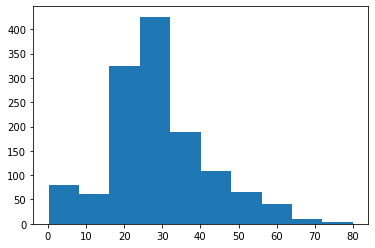

In [189]:
plt.hist(df.Age)

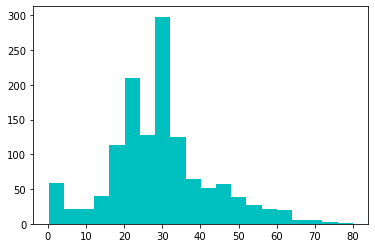

In [190]:
plt.hist(df.Age, bins =20, color = 'c')
plt.show()

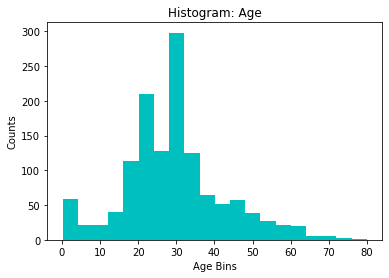

In [191]:
plt.hist(df.Age, bins =20, color = 'c')
plt.title('Histogram: Age')
plt.xlabel('Age Bins')
plt.ylabel('Counts')
plt.show()

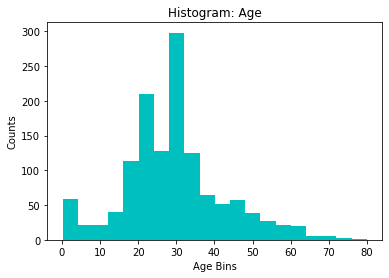

In [193]:
f, ax = plt.subplots()
ax.hist(df.Age, bins =20, color = 'c')
ax.set_title('Histogram: Age')#
ax.set_xlabel('Age Bins')
ax.set_ylabel('Counts')
plt.show()

##handy for subplots(multiples plots in single viz)

Text(0, 0.5, 'Counts')

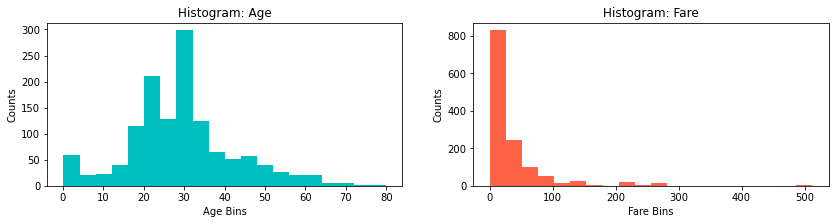

In [195]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(14,3))
ax1.hist(df.Age, bins =20, color = 'c')
ax1.set_title('Histogram: Age')#
ax1.set_xlabel('Age Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Fare, bins =20, color = 'tomato')
ax2.set_title('Histogram: Fare')#
ax2.set_xlabel('Fare Bins')
ax2.set_ylabel('Counts')

#### Can also use more than 2. With axis arrays. But too annoying to write everyhing down here. Just look it up later if necessary